In [1]:
# Dependencies
import random
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
# API source
from config import weather_api_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Add the latitudes and longitudes to a list.
#lat_lngs = zip(*lat_lngs)
#coordinates = list(lat_lngs)
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    print(lat_lng[0],lat_lng[1])
    break

54.02436020973104 -69.82431848289713


In [5]:
# Create list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # Filter out dupes
    if city not in cities:
        cities.append(city)
# confirmation
print(len(cities))

599


In [6]:
# URL for Weahter Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844


In [7]:
query_url = url + "appid" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844&q=Boston


In [9]:
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 65.8,
  'feels_like': 68.79,
  'temp_min': 62.6,
  'temp_max': 69.01,
  'pressure': 1014,
  'humidity': 100},
 'visibility': 8047,
 'wind': {'speed': 4.7, 'deg': 90},
 'clouds': {'all': 75},
 'dt': 1592881887,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
boston_data = city_weather.json()

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 65.8,
  'feels_like': 68.79,
  'temp_min': 62.6,
  'temp_max': 69.01,
  'pressure': 1014,
  'humidity': 100},
 'visibility': 8047,
 'wind': {'speed': 4.7, 'deg': 90},
 'clouds': {'all': 75},
 'dt': 1592881887,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 69.01 100 75 4.7


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-23 03:11:27'

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | polovinnoye
Processing Record 3 of Set 1 | marsa matruh
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | haines junction
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | jiguani
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | port macquarie
Processing Record 10 of Set 1 | muroto
Processing Record 11 of Set 1 | durban
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | santa isabel do rio negro
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | santa cruz
Processing Record 18 of Set 1 | ulyanovka
Processing Record 19 of Set 1 | letlhakane
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 22 of Set 1 | agadez
Processing Record 23 of Set 1 | fort 

Processing Record 36 of Set 4 | waycross
Processing Record 37 of Set 4 | novikovo
Processing Record 38 of Set 4 | qandala
Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | maku
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | sioux lookout
Processing Record 45 of Set 4 | tofield
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | oriximina
Processing Record 49 of Set 4 | saint anthony
Processing Record 50 of Set 4 | lappeenranta
Processing Record 1 of Set 5 | san ignacio
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | kamenka
Processing Record 4 of Set 5 | marzuq
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | bichena
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | beberibe
Processing Recor

Processing Record 26 of Set 8 | ziarat
Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | baraut
Processing Record 29 of Set 8 | muisne
Processing Record 30 of Set 8 | yumen
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | benghazi
Processing Record 33 of Set 8 | snasa
Processing Record 34 of Set 8 | miranorte
City not found. Skipping...
Processing Record 35 of Set 8 | gumushane
City not found. Skipping...
Processing Record 36 of Set 8 | oranjemund
Processing Record 37 of Set 8 | yeppoon
Processing Record 38 of Set 8 | bud
Processing Record 39 of Set 8 | moerai
Processing Record 40 of Set 8 | yaan
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | voghera
Processing Record 45 of Set 8 | monrovia
Processing Record 46 of Set 8 | cadiz
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | 

Processing Record 13 of Set 12 | ixtapa
Processing Record 14 of Set 12 | shaoyang
Processing Record 15 of Set 12 | kochubey
Processing Record 16 of Set 12 | barra do garcas
Processing Record 17 of Set 12 | alexandria
Processing Record 18 of Set 12 | neos oropos
Processing Record 19 of Set 12 | perigueux
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | pemangkat
Processing Record 22 of Set 12 | portland
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | buchanan
Processing Record 25 of Set 12 | fountain
Processing Record 26 of Set 12 | eenhana
Processing Record 27 of Set 12 | mantua
Processing Record 28 of Set 12 | poya
Processing Record 29 of Set 12 | lerwick
Processing Record 30 of Set 12 | sisimiut
Processing Record 31 of Set 12 | southampton
Processing Record 32 of Set 12 | norman wells
Processing Record 33 of Set 12 | pacifica
Processing Record 34 of Set 12 | pochutla
Processing Record 35 of Set 12 | hirara
Processing Record 36 of Set

In [17]:
len(city_data)

550

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,45.00,98,13,1.99,ZA,2020-06-23 03:12:42
1,Polovinnoye,54.79,65.99,54.41,69,53,9.17,RU,2020-06-23 03:12:42
2,Marsa Matruh,31.35,27.25,64.40,82,0,3.80,EG,2020-06-23 03:12:43
3,Albany,42.60,-73.97,82.00,86,7,3.06,US,2020-06-23 03:12:43
4,Haines Junction,60.75,-137.51,55.29,40,57,8.77,CA,2020-06-23 03:12:43


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Compile fields for dataframe to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592882035.0843349

# WeatherPy Charts

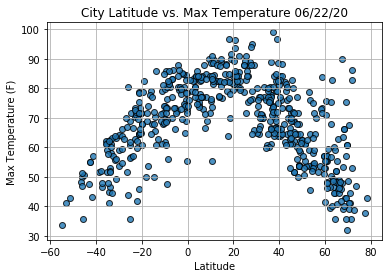

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

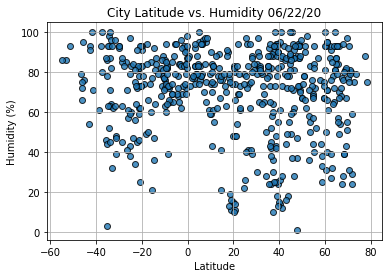

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

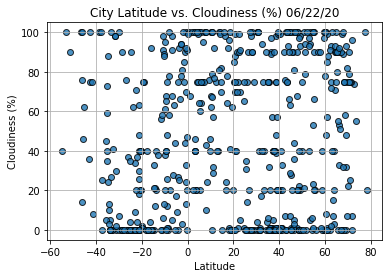

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

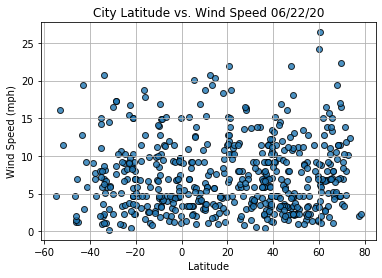

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression with SciPy

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

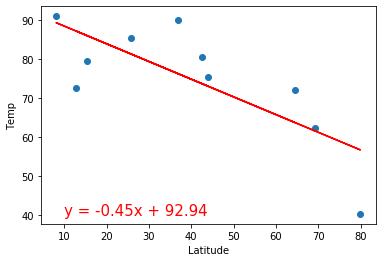

In [30]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

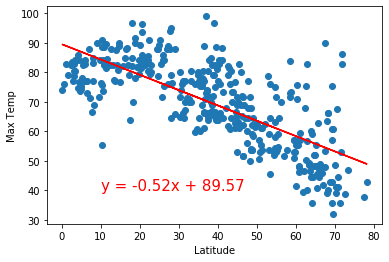

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

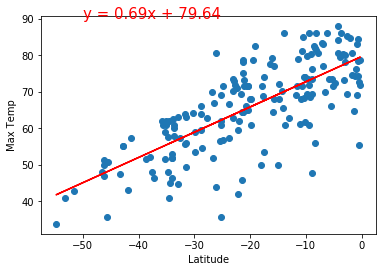

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

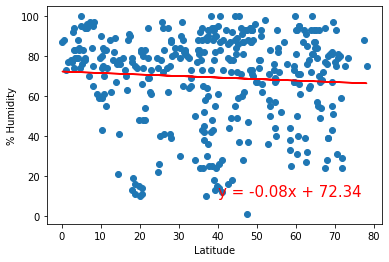

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

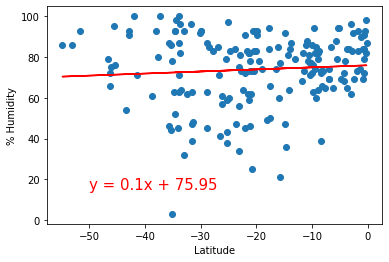

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

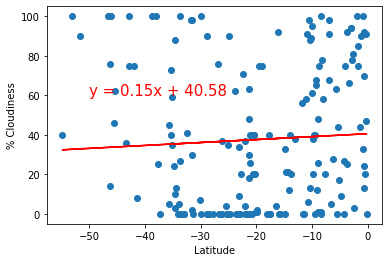

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere
                        for Wind Speed', 'Wind Speed',(40,35))